# Financial Data Analysis 

## 01. Load Data From Yahoo Finances

In [ ]:
!pip install yfinance

In [41]:
import pandas as pd 
import yfinance as yf

In [42]:
pd.options.display.float_format = '{:.4f}'.format

In [43]:
start = "2020-12-12"
end = "2021-12-13"
stock_symbol = "MSFT"


### 01.01. OHLC

In [44]:
df = yf.download(stock_symbol,start,end)
df.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,251.0000,251.0000,251.0000,251.0000,251.0000,251.0000
mean,269.5952,271.8828,267.4716,269.8754,268.7811,26030756.9721
std,36.1333,36.1830,35.8918,36.1205,36.6080,8283657.6010
min,212.1700,214.5100,211.9400,212.2500,210.4856,10550600.0000
25%,239.4400,243.0350,238.3350,240.3100,238.5876,20220150.0000
50%,259.8200,261.7800,257.8200,260.9000,259.5756,24326800.0000
75%,297.1400,299.2600,294.2950,296.8800,296.3378,30059450.0000
max,344.6200,349.6700,342.2000,343.1100,343.1100,69870600.0000


In [45]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-14,213.1000,216.2100,212.8800,214.2000,212.4194,28798400
2020-12-15,215.1700,215.4200,212.2400,214.1300,212.3500,27000600
2020-12-16,214.7500,220.1100,214.7200,219.2800,217.4572,35023300
2020-12-17,219.8700,220.8900,217.9200,219.4200,217.5960,32515800
2020-12-18,218.5900,219.6900,216.0200,218.5900,216.7729,63354900


### 01.02. Adj Close

It's only for dividend paying stocks (For the others the value would be equal to **Close Price**)

The other prices (OHLC) don't take account dividend payouts




### 01.03. Volume

It specifies the number of stocks traded during a day

## 02. Multi assets


### 02.01. Ticker Symbols 
* **BA** Boeing 
* **MSFT** Microsoft 
* **^DJI** Dow Jones Industrial Average *(US Stock Index)*
* **EURUSD=X** Exchange Rate for Currency Pair *(Forex)*
* **CG=F** Gold Price *(Precious Metal/Commodity)*
* **BTC-USD** Bitcoin in USD *(Cryptocurrency)*



In [46]:
symbols = ['BA','MSFT','^DJI','EURUSD=X','GC=F','BTC-USD']

In [47]:
df = yf.download(symbols,start,end)
df.tail()

[*********************100%***********************]  6 of 6 completed


Adj Close                      ...   Volume                             
                  BA    BTC-USD EURUSD=X  ...     GC=F          MSFT           ^DJI
Date                                      ...                                      
2021-12-09  207.5600 47672.1211   1.1346  ... 455.0000 22214200.0000 353020000.0000
2021-12-10  205.0600 47243.3047   1.1293  ... 545.0000 38077300.0000 361200000.0000
2021-12-11       nan 49362.5078      nan  ...      nan           nan            nan
2021-12-12       nan 50098.3359      nan  ...      nan           nan            nan
2021-12-13       nan 46737.4805   1.1312  ...      nan           nan            nan

[5 rows x 36 columns]

### 02.02. Multi-index Data Frame

In [48]:
df.describe()

Adj Close                      ...      Volume                             
             BA    BTC-USD EURUSD=X  ...        GC=F          MSFT           ^DJI
count  251.0000   367.0000 261.0000  ...    252.0000      251.0000       251.0000
mean   225.7551 46100.0517   1.1880  ...   4655.1429 26030756.9721 341000916.3347
std     15.9545 11166.5254   0.0265  ...  25550.4748  8283657.6010  86260257.8408
min    188.1900 18803.6562   1.1203  ...      0.0000 10550600.0000 145570000.0000
25%    213.3600 36657.5000   1.1730  ...     77.5000 20220150.0000 285115000.0000
50%    223.2200 47105.5156   1.1883  ...    241.5000 24326800.0000 322430000.0000
75%    236.7250 56157.8516   1.2122  ...    686.5000 30059450.0000 385325000.0000
max    269.1900 67566.8281   1.2341  ... 209783.0000 69870600.0000 811890000.0000

[8 rows x 36 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2020-12-12 to 2021-12-13
Freq: D
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BA)        251 non-null    float64
 1   (Adj Close, BTC-USD)   367 non-null    float64
 2   (Adj Close, EURUSD=X)  261 non-null    float64
 3   (Adj Close, GC=F)      252 non-null    float64
 4   (Adj Close, MSFT)      251 non-null    float64
 5   (Adj Close, ^DJI)      251 non-null    float64
 6   (Close, BA)            251 non-null    float64
 7   (Close, BTC-USD)       367 non-null    float64
 8   (Close, EURUSD=X)      261 non-null    float64
 9   (Close, GC=F)          252 non-null    float64
 10  (Close, MSFT)          251 non-null    float64
 11  (Close, ^DJI)          251 non-null    float64
 12  (High, BA)             251 non-null    float64
 13  (High, BTC-USD)        367 non-null    float64
 14  (High, EURUSD=X)       261 non-

#### Read a Multi-Index DataFrame

In [50]:
df.to_csv('multi_assets.csv')

In [51]:
df = pd.read_csv('multi_assets.csv',header = [0,1],index_col = 0,parse_dates = [0])
df.tail()

Adj Close                      ...   Volume                             
                  BA    BTC-USD EURUSD=X  ...     GC=F          MSFT           ^DJI
Date                                      ...                                      
2021-12-09  207.5600 47672.1211   1.1346  ... 455.0000 22214200.0000 353020000.0000
2021-12-10  205.0600 47243.3047   1.1293  ... 545.0000 38077300.0000 361200000.0000
2021-12-11       nan 49362.5078      nan  ...      nan           nan            nan
2021-12-12       nan 50098.3359      nan  ...      nan           nan            nan
2021-12-13       nan 46737.4805   1.1312  ...      nan           nan            nan

[5 rows x 36 columns]

#### Queries

In [52]:
df.loc[:,("Close","BA")] #column

Date
2020-12-12        nan
2020-12-13        nan
2020-12-14   228.6200
2020-12-15   229.5000
2020-12-16   225.8700
               ...   
2021-12-09   207.5600
2021-12-10   205.0600
2021-12-11        nan
2021-12-12        nan
2021-12-13        nan
Name: (Close, BA), Length: 367, dtype: float64

In [53]:
df.Close.BA #column

Date
2020-12-12        nan
2020-12-13        nan
2020-12-14   228.6200
2020-12-15   229.5000
2020-12-16   225.8700
               ...   
2021-12-09   207.5600
2021-12-10   205.0600
2021-12-11        nan
2021-12-12        nan
2021-12-13        nan
Name: BA, Length: 367, dtype: float64

In [54]:
df.loc['2021-12-08'] #row 

Adj Close  BA                 211.0300
           BTC-USD          50504.7969
           EURUSD=X             1.1277
           GC=F              1783.4000
           MSFT               334.9700
           ^DJI             35754.7500
Close      BA                 211.0300
           BTC-USD          50504.7969
           EURUSD=X             1.1277
           GC=F              1783.4000
           MSFT               334.9700
           ^DJI             35754.7500
High       BA                 212.6800
           BTC-USD          51171.3750
           EURUSD=X             1.1339
           GC=F              1789.9000
           MSFT               335.5000
           ^DJI             35840.5195
Low        BA                 207.7100
           BTC-USD          48765.9883
           EURUSD=X             1.1270
           GC=F              1779.0000
           MSFT               330.8000
           ^DJI             35602.6484
Open       BA                 209.1800
           BTC-USD       

In [55]:
df.loc['2020'].head() # per year

Adj Close                      ...    Volume                             
                  BA    BTC-USD EURUSD=X  ...      GC=F          MSFT           ^DJI
Date                                      ...                                       
2020-12-12       nan 18803.6562      nan  ...       nan           nan            nan
2020-12-13       nan 19142.3828      nan  ...       nan           nan            nan
2020-12-14  228.6200 19246.6445   1.2133  ...  258.0000 28798400.0000 371980000.0000
2020-12-15  229.5000 19417.0762   1.2149  ...  961.0000 27000600.0000 417770000.0000
2020-12-16  225.8700 21310.5977   1.2154  ... 1090.0000 35023300.0000 344590000.0000

[5 rows x 36 columns]

In [56]:
df.loc["2021-02",("Close","BTC-USD")] #row x column 

Date
2021-02-01   33537.1758
2021-02-02   35510.2891
2021-02-03   37472.0898
2021-02-04   36926.0664
2021-02-05   38144.3086
2021-02-06   39266.0117
2021-02-07   38903.4414
2021-02-08   46196.4648
2021-02-09   46481.1055
2021-02-10   44918.1836
2021-02-11   47909.3320
2021-02-12   47504.8516
2021-02-13   47105.5156
2021-02-14   48717.2891
2021-02-15   47945.0586
2021-02-16   49199.8711
2021-02-17   52149.0078
2021-02-18   51679.7969
2021-02-19   55888.1328
2021-02-20   56099.5195
2021-02-21   57539.9453
2021-02-22   54207.3203
2021-02-23   48824.4258
2021-02-24   49705.3320
2021-02-25   47093.8516
2021-02-26   46339.7617
2021-02-27   46188.4531
2021-02-28   45137.7695
Name: (Close, BTC-USD), dtype: float64

### 02.03. Swap Levels (Data Frame Indeces) 

In [57]:
df2 = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df2.head()

BA                    ...       ^DJI                          
           Adj Close    Close     High  ...        Low       Open         Volume
Date                                    ...                                     
2020-12-12       nan      nan      nan  ...        nan        nan            nan
2020-12-13       nan      nan      nan  ...        nan        nan            nan
2020-12-14  228.6200 228.6200 237.6300  ... 29849.1504 30123.9102 371980000.0000
2020-12-15  229.5000 229.5000 232.5000  ... 29894.9492 29919.0898 417770000.0000
2020-12-16  225.8700 225.8700 232.3700  ... 30080.1094 30191.3809 344590000.0000

[5 rows x 36 columns]

### 02.04. Close Prices


In [58]:
close = df.Close.copy()

close.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,251.0000,367.0000,261.0000,252.0000,251.0000,251.0000
mean,225.7551,46100.0517,1.1880,1801.4988,269.8754,33755.0104
std,15.9545,11166.5254,0.0265,52.0877,36.1205,1760.1197
min,188.1900,18803.6562,1.1203,1677.7000,212.2500,29861.5508
25%,213.3600,36657.5000,1.1730,1768.0500,240.3100,32623.7256
50%,223.2200,47105.5156,1.1883,1793.6000,260.9000,34323.0508
75%,236.7250,56157.8516,1.2122,1836.3000,296.8800,34991.5996
max,269.1900,67566.8281,1.2341,1952.7000,343.1100,36432.2188


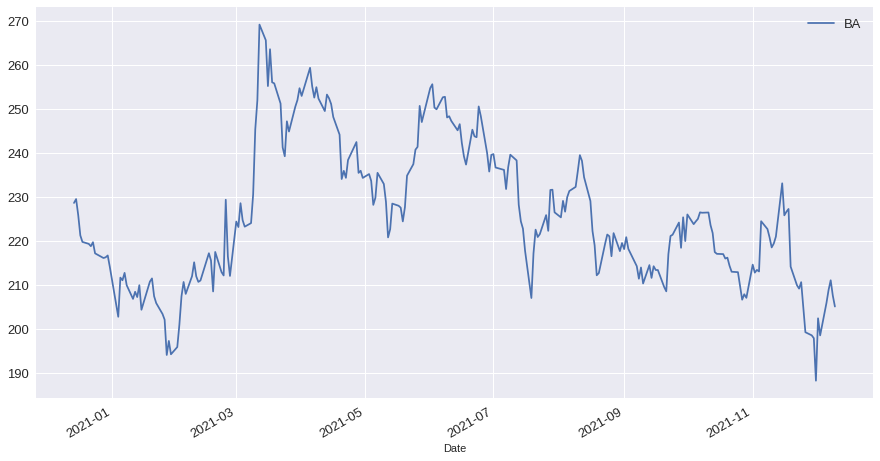

In [59]:
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

close.BA.dropna().plot(figsize = (15,8),fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

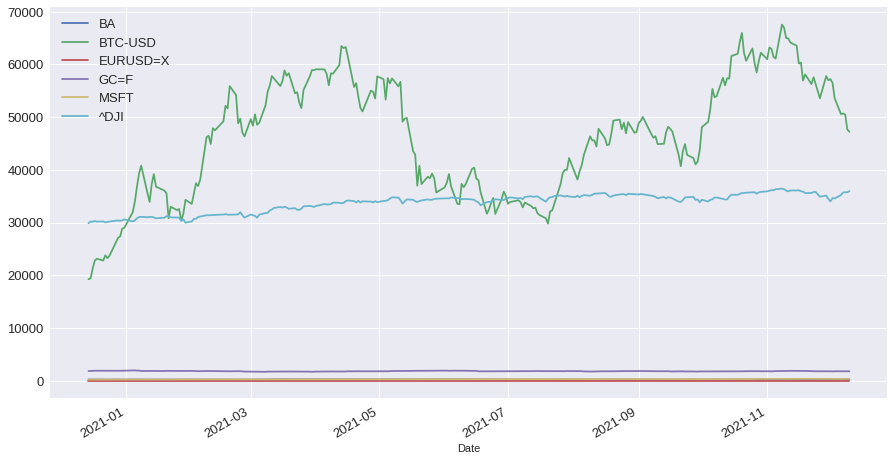

In [60]:
close.dropna().plot(figsize = (15,8),fontsize = 13)
plt.legend(fontsize = 13)
plt.show()